# **Applied Statistics**

---

**Author: Damien Farrell**

---

In [73]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import scipy.stats as stats

sns.set_theme()

---

## **Task One: Permutations and Combinations**

Part One:

> Suppose we alter the Lady Tasting Tea experiment to involve twelve cups of tea. Six have the milk in first and the other six having tea in first. A person claims they have the special power of being able to tell whether the tea or the milk went into a cup first upon tasting it. You agree to accept their claim if they can tell which of the six cups in your experiment had the milk in first.
<br><br>
> Calculate, using Python, the probability that they select the correct six cups. Here you should assume that they have no special powers in figuring it out, that they are just guessing. Remember to show and justify your workings in code and MarkDown cells.
<br><br>

**References**

1. [Python math.comb() Method](https://www.w3schools.com/python/ref_math_comb.asp)
1. [Need to clarify the "At-least Concept" in Combination.](https://math.stackexchange.com/questions/179660/need-to-clarify-the-at-least-concept-in-combination)
1. [Markdown](https://learninglab.gitlabpages.inria.fr/mooc-rr/mooc-rr-ressources/module1/ressources/introduction_to_markdown.html)
---

In [74]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 6

# Number of cups of tea with tea in first.
no_cups_tea_first = 6

In [75]:
# Number of ways of selecting six cups from twelve.
ways = math.comb(no_cups, no_cups_milk_first)

# Show.
ways

924

In [76]:
# There is only 1 correct outcome
correct_outcomes = 1

# Probability of selecting the correct 6 cups
probability = correct_outcomes / ways

probability

0.0010822510822510823

The probability that the person, guessing randomly, correctly identifies all six cups with milk poured first is approximately 0.108%.

Part Two:

> Suppose, now, you are willing to accept one error. Once they select the six cups they think had the milk in first, you will give them the benefit of the doubt should they have selected at least five of the correct cups. Calculate the probability, assuming they have no special powers, that the person makes at most one error.
<br><br>
> Would you accept two errors? Explain.

To have exactly 5 correct out of the 6 "milk-first" cups, we choose 5 from the correct 6. We must also choose 1 cup from the 6 "tea-first" cups.

The number of ways to have exactly 5 correct is:

$\binom{6}{5}$.$\binom{1}{6}$ 


In [77]:
# Probability of exactly 5 correct guesses (and 1 incorrect)
# Choose 5 out of the correct 6 AND choose 1 out of the 6 incorrect
probability_five_correct = (
    math.comb(no_cups_milk_first, 5) * math.comb(no_cups - no_cups_milk_first, 1)
) / math.comb(no_cups, 6)

# Total probability of at most one error
prob_at_most_one_error = probability + probability_five_correct

prob_at_most_one_error

0.04004329004329004

There is approximately a 4% chance that the person guesses with at most one error.

The probability of getting at least 4 correct is much higher, which significantly increases the chance that someone could guess successfully by pure luck. This makes the test less stringent.

This can be shown below:

In [78]:
# Probability of exactly 4 correct (and 2 incorrect)
# Choose 4 out of the correct 6 AND choose 2 out of the 6 incorrect
probability_four_correct = (
    math.comb(no_cups_milk_first, 4) * math.comb(no_cups - no_cups_milk_first, 2)
) / math.comb(no_cups, 6)

# Total probability of at most two error
prob_at_most_two_error = probability + probability_five_correct + probability_four_correct

prob_at_most_two_error

0.28354978354978355

There is approximately a 28% chance that the person guesses with at most two errors.

---

## **Task Two: numpy's Normal Distribution**


> In this task you will assess whether `numpy.random.normal()` properly generates normal values.
To begin, generate a sample of one hundred thousand values using the function with mean `10.0` and standard deviation `3.0`.
<br><br>
> Use the `scipy.stats.shapiro()` function to test whether your sample came from a normal distribution.
Explain the results and output.
<br><br>
> Plot a histogram of your values and plot the corresponding normal distribution probability density function on top of it.

**References**

1. [numpy.random.normal](https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html)
1. [scipy.stats.shapiro()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html#shapiro)

---

In [79]:
# Generate a random normal sample.
data = np.random.normal(10, 3, 100_000)

# Show.
data

array([13.32895147, 14.59704314, 15.24025257, ...,  9.08965804,
        8.30408944, 10.73483589], shape=(100000,))

In [82]:
# Perform the Shapiro Wilk test.
stats.shapiro(data)

ShapiroResult(statistic=np.float64(0.9999786520253139), pvalue=np.float64(0.884545090637449))

The Shapiro-Wilk test checks if a sample likely comes from a normal distribution. Its null hypothesis states that the sample is drawn from a normal distribution. The p_value is greater than a 0.05 significance level. This would mean I would fail to reject the null hypothesis. I have no evidence that the data is not from a normal distribution.

In [ ]:
def f(x, mu=10.0, sigma=3.0):
  # The normalisation constant.
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # f(x)
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

In [ ]:
# Create an x range.
x = np.linspace(-50, 50, 100_000)

# Get y values.
y = f(x)

# Show.
x, y

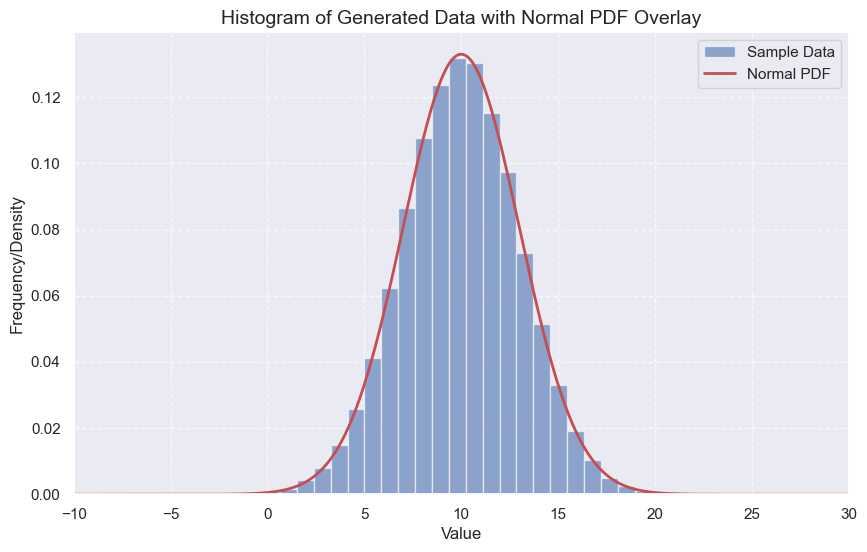

In [107]:
# Create an empty figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the histogram of the data
ax.hist(data, bins=30, density=True, alpha=0.6, label='Sample Data')

# Plot the normal PDF on top
ax.plot(x, y, 'r', linewidth=2, label='Normal PDF')

# Add labels, title, legend, and grid
ax.set_xlim([-10, 30])
ax.set_xlabel('Value', fontsize=12)
ax.set_ylabel('Frequency/Density', fontsize=12)
ax.set_title('Histogram of Generated Data with Normal PDF Overlay', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Display the plot
plt.show()

---

## **Task Three: t-Test Calculation**

Consider the following dataset containing resting heart rates for patients before and after a two-week exercise program.

| Patient ID |  0 |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |
|:-----------|---:|---:|---:|---:|---:|---:|---:|---:|---:|---:|
| **Before** | 63 | 68 | 70 | 64 | 74 | 67 | 70 | 57 | 66 | 65 |
| **After**  | 64 | 64 | 68 | 64 | 73 | 70 | 72 | 54 | 61 | 63 |

Calculate the t-statistic for this dataset using Python, and compare it to the value given by `scipy.stats`. Explain your method and provide any sources used.


**References**

1. [stats.ttest_rel](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#ttest-rel)
1. [Student's t-test](https://www.youtube.com/watch?v=pTmLQvMM-1M&t=31s)
1. [numpy.std](https://numpy.org/doc/2.1/reference/generated/numpy.std.html#numpy-std)

---

In [108]:
# Putting the table into numpy arrays
before = np.array([63, 68, 70, 64, 74, 67, 70, 57, 66, 65])
after = np.array([64, 64, 68, 64, 73, 70, 72, 54, 61, 63])

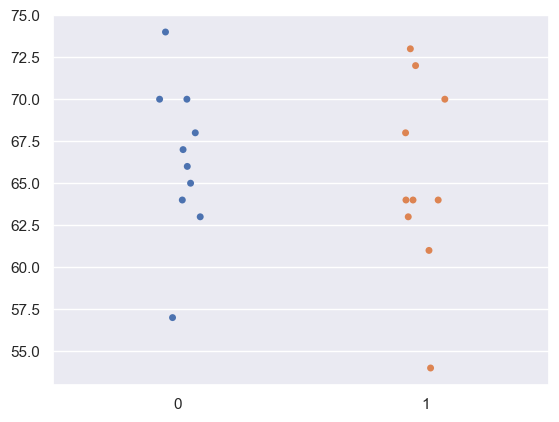

In [109]:
# Stripplot to visualise the data
sns.stripplot(data=[before,after]);

In [120]:
# Paired samples t-test using scipy_stats.
scipy_stats = stats.ttest_rel(before, after)

scipy_stats

TtestResult(statistic=np.float64(1.337227482480628), pvalue=np.float64(0.21396011317404623), df=np.int64(9))

Calculating the [student's t-test](https://www.youtube.com/watch?v=pTmLQvMM-1M&t=31s) manually using the below formula.

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}}$


In [111]:
# Getting the difference between the two arrays
difference = before - after

# Getting the mean between
mean_difference = np.mean(difference)

mean_difference

np.float64(1.1)

In [90]:
# Sample standard deviation
std_difference = np.std(difference, ddof=1)

std_difference

np.float64(2.6012817353502227)

In [113]:
# Number of observations
n = len(difference)  

n

10

In [121]:
# Manually calcuating the T-Statistic using mean, standard deviation, and number of observations.
manual_t_statistic = mean_difference / (std_difference / np.sqrt(n))

manual_t_statistic

np.float64(1.3372274824806283)

In [124]:
manual_t_statistic == scipy_stats[0]


np.True_

The manually calculated T-Statistic matches the T-Statistic calculated by `scipy.stats`.

The null hypothesis is that there is no difference between the mean of the two samples.

Using a t table, with a degrees of freedom (ddof) of $n_1 + n_2 -2 = 18$, the critical value is $2.10$ for a p-value of $0.05$. 

We would not reject the null hypothesis as the critial value $(2.1)$ is greater than the t-test statistic $(1.34)$. The scipy_stats p-value is also greater than $0.05$.

---
## **Task Four: ANOVA**

> In this test we will estimate the probability of committing a type II error in specific circumstances.
> To begin, create a variable called `no_type_ii` and set it to `0`.
<br><br>
> Now use a loop to perform the following test 10,000 times.
<br><br>
> 1. Use `numpy.random.normal` to generate three samples with 100 values each. Give each a standard deviation of `0.1`. Give the first sample a mean of `4.9`, the second a mean of `5.0`, and the third a mean of `5.1`. 
<br><br>
> 2. Perform one-way anova on the three samples and add `1` to `no_type_ii` whenever a type II error occurs.
<br><br>
>
> Summarize and explain your results.
<br>

**References**


1. [How to ](https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/)



---


In [92]:
no_type_ii = 0

def create_samples():
    sample_1 = np.random.normal(4.9, 0.1, 100)
    sample_2 = np.random.normal(5.0, 0.1, 100)
    sample_3 = np.random.normal(5.1, 0.1, 100)
    df = pd.DataFrame({'Sample 1': sample_1, 'Sample 2': sample_2, 'Sample 3': sample_3})
    return df

for _ in range(10_001):
    df = create_samples()
    # Perform ANOVA.
    f_statistic, p_value = stats.f_oneway(df['Sample 1'], df['Sample 2'], df['Sample 3'])
    if p_value > 0.05:
        no_type_ii += 1

no_type_ii

0

TIDY THIS CRAP UP. MAKING FUNCTION FOR IT ALL AND SEPERATE THE VARIABLES

***
# End